In [11]:
import torch
import matplotlib.pyplot as plt
  

In [12]:
def Produce_X(x):
    x0 = torch.ones(x.numpy().size)   #根据输入的x的维度生成各元素为1的向量
    x = torch.stack((x,x0),dim =1 )    #将两个向量合并为矩阵
    return x

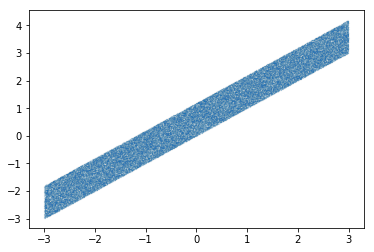

In [13]:
#x = torch.Tensor([1.4,5,11,16,21])
#y = torch.Tensor([14.4,29.6,62,85.5,113.4])
x = torch.linspace(-3,3,100000) #在-3到3之间分化出100000个数
X = Produce_X(x)
y = x+1.2*torch.rand(x.size())#基于x和相应个数的随机数生成y
w = torch.rand(2)

plt.scatter(x.numpy(),y.numpy(),s=0.001)
plt.show()

In [14]:
#检测是否支持CUDA
CUDA = torch.cuda.is_available()
if CUDA:   
    inputs = X.cuda()
    target = y.cuda()
    w = w.cuda()
    w.requires_grad = True   #开启自动微分
    print("GPU")
else:
    inputs = X
    target = y
    w = w
    w.requires_grad = True   #开启自动微分
    print("CPU")

#w = torch.rand(2,requires_grad=True)   #随机初始化一个参数向量 w , w数与叶子节点，开启自动微分
#print(X)

GPU


In [15]:
def train(epochs =1,learning_rate = 0.01):
    for epoch in range(epochs):
        #前向传播
        output = inputs.mv(w)     #根据当前w值计算y值，mv（）是矩阵乘向量
        loss = (output - target).pow(2).sum() / 100000  # 计算损失值（误差）计算的y-真实的y，求平方差
        #print(loss)
        #反向传播
        loss.backward()    #反向传播自动计算出损失函数关于w的梯度向量
        #print("本次梯度是：",w.grad)
        w.data -= learning_rate * w.grad   #   更新w        
        w.grad.zero_()   #更新完w后必须情况其grad值
        
        if epoch % 1000 == 0:
            draw(output,loss)
            print("本次梯度是：",w.grad)
        
    #print(output)
    return w,loss

In [16]:
def draw(output,loss):
    if CUDA:
        output = output.cpu()   #如果使用了CUDA，画图时需要把GPU数据转移到CPU
    plt.cla()
    plt.scatter(x.numpy(),y.numpy())
    plt.plot(x.numpy(),output.data.numpy(),'r-',lw=5)
    plt.text(0.5,0,'loss=%s'% (loss.item()),fontdict={'size':20,'color':'red'})
    plt.pause(0.005)

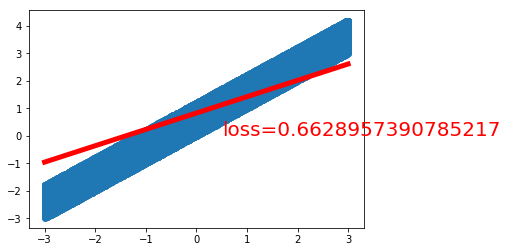

本次梯度是： tensor([0., 0.], device='cuda:0')


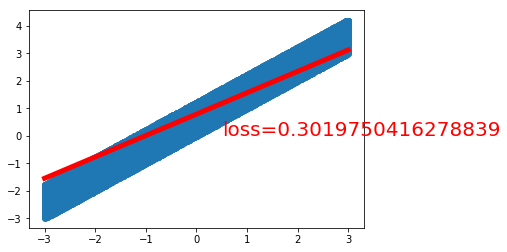

本次梯度是： tensor([0., 0.], device='cuda:0')


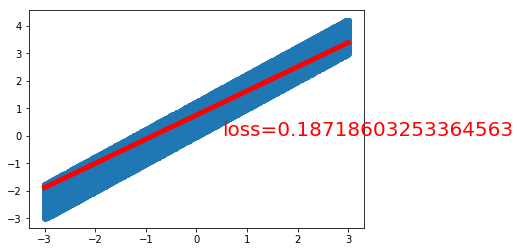

本次梯度是： tensor([0., 0.], device='cuda:0')


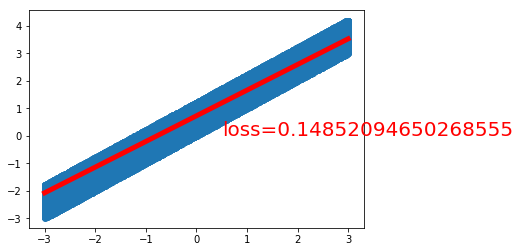

本次梯度是： tensor([0., 0.], device='cuda:0')


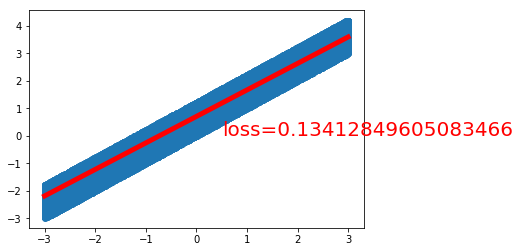

本次梯度是： tensor([0., 0.], device='cuda:0')


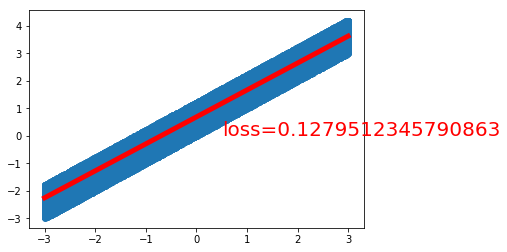

本次梯度是： tensor([0., 0.], device='cuda:0')


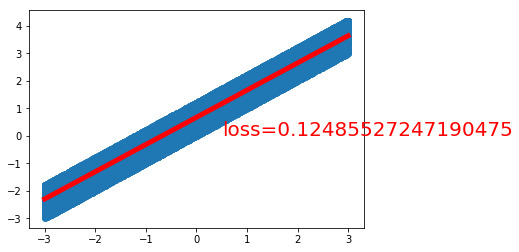

本次梯度是： tensor([0., 0.], device='cuda:0')


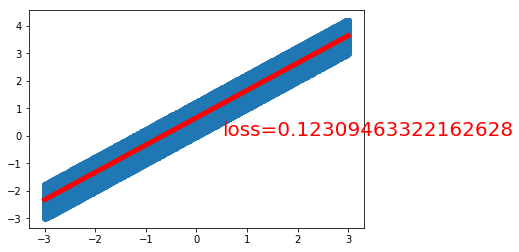

本次梯度是： tensor([0., 0.], device='cuda:0')


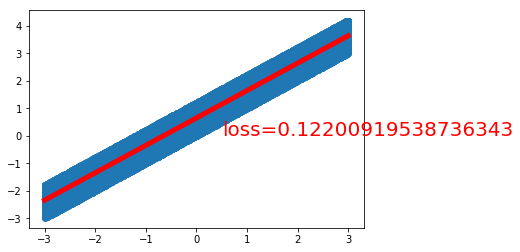

本次梯度是： tensor([0., 0.], device='cuda:0')


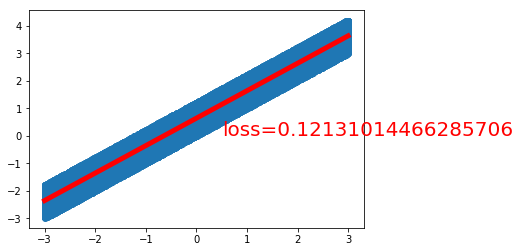

本次梯度是： tensor([0., 0.], device='cuda:0')
final loss: 0.12085054069757462
weights: tensor([0.9986, 0.6315], device='cuda:0')


In [17]:
w,loss =train(10000,learning_rate=1e-4)
print("final loss:",loss.item())
print("weights:",w.data)